<a href="https://colab.research.google.com/github/Orikson/MAT-421/blob/main/CSE421_Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

In this notebook, we go over some basic concepts from calculus in order to build up the knowledge that we need in order to solve some optimization problems.

1. Using $f(x) = \frac{x}{2} + \sin(x)$, and given some initial condition $f(x_0) = y_0$, find a local minima using gradient descent.

2. Using $f(x) = x^{4}-3x^{3}+2x^{2}$, and given some initial condition $f(x_0) = y_0$, find a local minima using gradient desecent.

In [14]:
import sympy
sympy.init_printing()

import numpy as np
import math
import matplotlib.pyplot as plt

# Continuity and Differentiation

## Continuity
To understand continuity, one must first understand limits. As defined in the notes, the limit of some real-valued function $f: D \rightarrow \mathbb{R}$ on $D \subseteq \mathbb{R}^d$ as $\mathbf{x} \in D$ approaches $\mathbf{a} \in \mathbb{R}^d$ is $L \in \mathbb{R}$ if for any $\epsilon > 0$, there exists $\delta > 0$ such that $|f(\mathbf{x}) - L| < \epsilon$ for all $\mathbf{x} \in D \cap B_\delta(\mathbf{a}) \setminus \{ \mathbf{a} \}$. Here, $B_\delta(\mathbf{a})$ denotes the Euclidean ball of radius $\delta$ centered at $\mathbf{a}$. Notably, this limit definition does **NOT** include the value $\mathbf{a}$, implying that the function at $\mathbf{a}$ may not even be defined.

This is important when it comes to the definition of continuity, because continuity is when the function is not only defined at $\mathbf{a}$, but satisfies $\lim_{\mathbf{x} \rightarrow \mathbf{a}} f(\mathbf{x}) = f(\mathbf{a})$.

## Derivatives
This leads to the concept of derivatives, which measures how fast a variable changes with respect to another variable. The limit definition of a derivative for a function $f(x)$ is
$$f'(x_0) = \frac{\text{d} f(x_0)}{\text{d} x} = \lim_{h \rightarrow 0} \frac{f(x_0 + h) - f(x_0)}{h}$$
One nice property of this is that differentiation is a linear operator, i.e.
$$[\alpha f(x) + \beta g(x)]^\prime = \alpha f^\prime(x) + \beta g^\prime(x)$$

Equivalently, this derivative can be thought of as the slope of the line (and in higher dimensions, this generalizes to a hyperplane) that is the best local (local with respect to the open Euclidean ball $B_\delta(x)$ as $\delta$ approaches 0) approximation of the function at that point. This implies that there exists some open Euclidean ball $B_\delta(x_0)$ such that if $f^\prime(x_0) > 0$, then for all $x \in B_\delta(x_0)$ if $x > x_0$ we know $f(x) > f(x_0)$, and vice versa. If $f^\prime(x_0) < 0$ then the opposite is true.

This realization leads directly to Rolle's theorem which states that if we let $f: [a, b] \rightarrow \mathbb{R}$ be a real-valued continuous function with a derivative that exists on $(a, b)$, then if $f(a) = f(b)$, there exists $c \in (a, b)$ such that $f^\prime(c) = 0$. This is known by the following cases. If $f(x) = f(a)$ for all $x \in (a, b)$, then the derivative is $0$ along $(a, b)$. If we consider the maximum value of the function $f(c) = m > f(a)$ (and if there is no such maximum consider $-f$) then $f^\prime(c) = 0$ because otherwise there would exist a Euclidean ball $B_\delta(c)$ that contains a point $c^\prime$ such that $f(c^\prime) > f(c)$, contradicting the assumption that $f(c)$ is the maximum value of the function along the open interval.

What follows from this is the mean value theorem, which states that on a real-valued continuous function $f: [a, b] \rightarrow \mathbb{R}$, then for any $a, b$, there exists $c \in (a, b)$ such that $f'(c) = \frac{f(b) - f(a)}{b - a}$

## Analytical Derivatives
Sympy is a Python package for symbolic mathematics, which is a powerful tool for finding analytical derivatives or limits quickly.

In this code we evaluate the following limits and derivatives on the function $f(x) = \frac{x}{2} + \sin(x)$
1. $\lim_{x \rightarrow 1} f(x)$
2. $f^\prime(x)$

In [5]:
x = sympy.Symbol('x')
print('Problem 1:')
display(sympy.limit(x / 2 + sympy.sin(x), x, 1))

print('\nProblem 2:')
display(sympy.diff(x / 2 + sympy.sin(x), x))

Problem 1:


1/2 + sin(1)


Problem 2:


cos(x) + 1/2

## Numerical Derivatives
Sometimes the functions we are evaluating are complicated and don't have known analytical derivatives. In these cases, it is often easier to evaluate derivatives numerically. Here, we implement some simple finite difference schemes. One can devise many numerical approximations for the derivative at a point, but these finite differencing schemes are among the simplest.

The following is a central differencing method. Consider the limit definition of the derivative. We know that
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x_0 + h) - f(x_0)}{h}$$
Note that the above definition is equivalent to
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x_0) - f(x_0 - h)}{h}$$
If we add these together we find
$$2f'(x) = \lim_{h \rightarrow 0} \frac{f(x_0 + h) - f(x_0 - h)}{h}$$
or
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x_0 + h) - f(x_0 - h)}{2h}$$
The idea of central differences is that we approximate the limit by taking a small but finite value of $h \in \mathbb{R}$. It can be proved that in this form central differences is second order accurate (i.e. accurate to order $O(h^2)$).

We use this central difference method to compare a numerical solution of the derivative of $f(x) = \frac{x}{2} + \sin(x)$ at different choices of $h$ to the exact solution given by Sympy above, $f(x) = \frac{1}{2} + \cos(x)$.

As shown in the results, it is clear that if we choose smaller values of $h$, our error decreases.

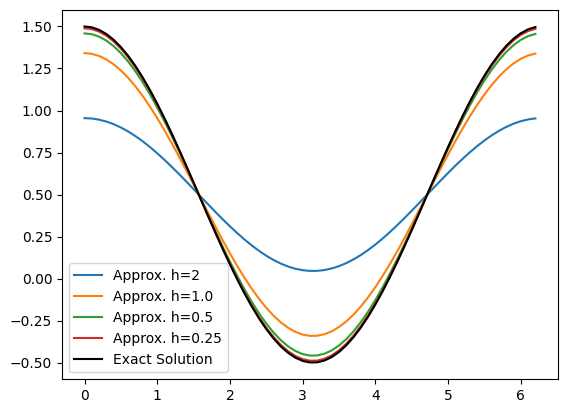

In [21]:
def central_difference(f, x, h):
  return (f(x + h) - f(x - h)) / (2*h)

def f(x):
  return x / 2 + np.sin(x)

h = 2
x = np.arange(0, 2*np.pi, 0.1)
ye = 0.5 + np.cos(x)

for i in range(4):
  yp = central_difference(f, x, h)
  plt.plot(x, yp, label=f'Approx. h={h}')
  h /= 2
plt.plot(x, ye, color='k', label='Exact Solution')

plt.legend()
plt.show()

# Taylor Theorem

The mean value theorem leads to another powerful theorem called the Taylor Theorem, which essentially is a means to find local polynomial approximations (again with respect to the limiting Euclidean ball) of a function. The Taylor Theorem produces polynomial approximations about a point $c$ by the following summation
$$f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(c)}{n!} (x - c)^n$$
Similarly the best $n$th degree local polynomial approximation can be found by truncating the Taylor expansion to the $n$th order.

## Analytical Taylor Expansion

Again, we can leverage Sympy to find analytical $n$th order Taylor expansions.

In this code, we find the 4th order expansion of $f(x) = \frac{x}{2} + \sin(x)$ about $x = 0$

In [4]:
x = sympy.Symbol('x')
display(sympy.series(x / 2 + sympy.sin(x), x, 0, 4))

       3        
3⋅x   x     ⎛ 4⎞
─── - ── + O⎝x ⎠
 2    6         

## Numerical Taylor Expansion

We can, of course, by leveraging the central differences method above, compute these Taylor expansions numerically

In this code, we find the 4th order expansion of $f(x) = \frac{x}{2} + \sin(x)$ about $x = 0$ and compare it to the analytical solution found by Sympy.

Again, it is clear for smaller choices of $h$ that our error decreases.

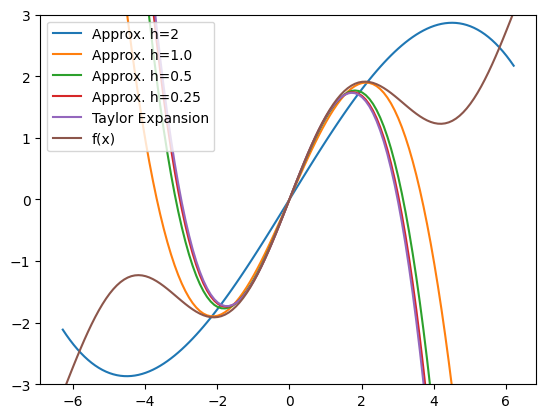

In [48]:
def nth_deriv(f, x, h, n):
  if n == 0:
    return f(x)
  return central_difference(lambda y : nth_deriv(f, y, h, n-1), x, h)

class Taylor:
  def __init__(self, f, c, n, h=0.01):
    '''
    f - function to Taylor expand
    c - center of expansion
    n - degree of expansion
    h - step size
    '''
    self.f = f
    self.c = c
    self.n = n
    self.h = h

    self.coeff = np.array([nth_deriv(f, c, h, i) / math.factorial(i) for i in range(n+1)])

  def __call__(self, x):
    tmp = [self.coeff[i] * (x - self.c)**i for i in range(self.n+1)]
    return sum(tmp)

h = 2
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
ys= x/2 + np.sin(x)
ye= 3*x/2 - x**3/6

for i in range(4):
  te = Taylor(f, 0, 4, h)
  plt.plot(x, te(x), label=f'Approx. h={h}')
  h /= 2

plt.plot(x, ye, label='Taylor Expansion')
plt.plot(x, ys, label='f(x)')

plt.ylim(-3, 3)
plt.legend()
plt.show()

# Optimization with Gradient Descent

Using this local approximation by Taylor expansion, it becomes more obvious which direction we might find a local minimizer (or maximizer) of a function. A local minimizer is a point along the function such that all points excluding the minimizing point in some small Euclidean ball about the minimizing point have a function value larger than or equal to the value of the function at the point. The converse is true about a local maximizer. A global minimizer, on the other hand, is one that all other points in the function domain have a function value larger than or equal to the function at the global minimizer. If the inequality is instead a strict inequality, then the point is called a strict local or global minimizer instead.

We consider any direction that decreases the function at some non-zero step away to be a descent direction. In the continuously differentiable case, this is given by the directional derivative, i.e. if
$$\frac{\partial f(\mathbf{x}_0)}{\partial \mathbf{v}} < 0$$
then $\mathbf{v}$ is a descent direction.

Following from proofs given prior, it is apparent that on a real-valued and continuously differentiable function $f$, the derivative of $f$ at a local minimizer must be 0. Additionally, as proven by the notes, the Hessian matrix of $f$ at a local minimizer must be positive semidefinite, i.e., in the 2D case, concave up. It is a necessary and sufficient condition of a strict local minimizer to have a 1st derivative of 0 and a positive semidefinite Hessian matrix (2nd derivative).

## Steepest Descent
A steepest descent -- or gradient descent -- algorithm takes advantage of this local approximation and moves in the largest minimizing direction, the negative gradient.

We use the numerical approximation methods we defined above to perform a simple steepest descent minimization, and solve the following problems for various initial conditions

1. Using $f(x) = \frac{x}{2} + \sin(x)$, and given some initial condition $f(x_0) = y_0$, find a local minima using gradient descent.

2. Using $f(x) = x^{4}-3x^{3}+2x^{2}$, and given some initial condition $f(x_0) = y_0$, find a local minima using gradient desecent.

Found local minimizer x=-2.0943002910888033 starting from x0=1
Found local minimizer x=4.188678986888363 starting from x0=3
Found local minimizer x=8.406800534370418e-05 starting from x0=0.6
Found local minimizer x=1.6403337487025829 starting from x0=1


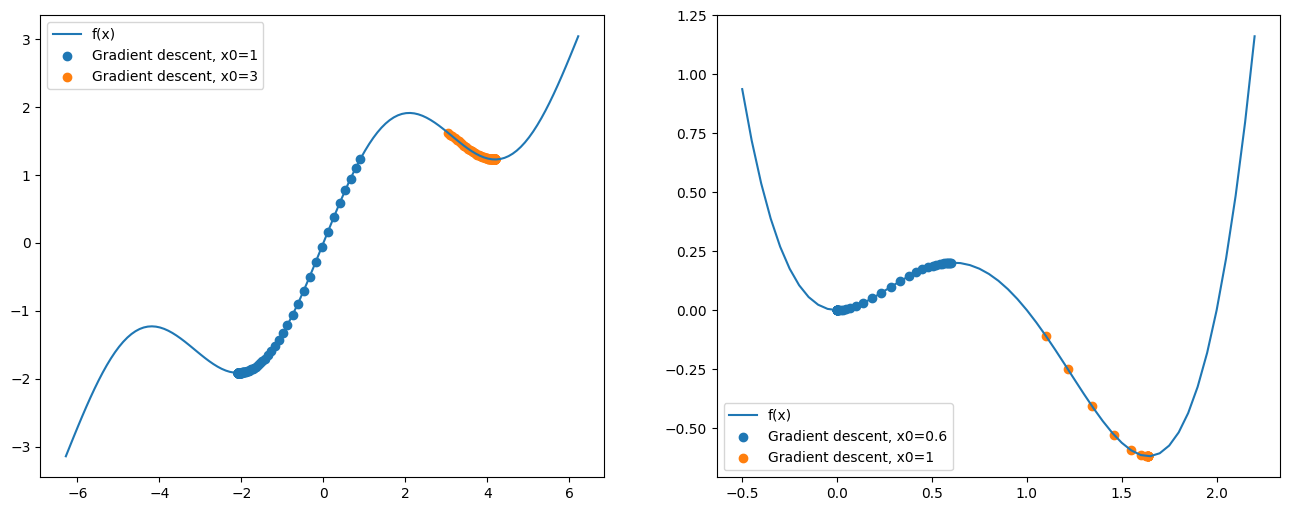

In [64]:
class SteepestDescent:
  def __init__(self, f, x0, s=0.01, h=0.01):
    '''
    f - function to minimize
    x0 - initial guess
    s - descent step size
    h - approximation size
    '''
    self.f = f
    self.x = x0
    self.s = s
    self.h = h

  def step(self):
    n_grad = -nth_deriv(self.f, self.x, self.h, 1)
    self.x = self.x + self.s * n_grad
    return self.x, n_grad

def f1(x):
  return x / 2 + np.sin(x)

def f2(x):
  return x**4 - 3*x**3 + 2*x**2

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
plt.plot(x, f1(x), label='f(x)')

x0s = [1, 3]
for x0 in x0s:
  sd1 = SteepestDescent(f1, x0, s=0.1)
  xs = []
  while True:
    xn, gn = sd1.step()
    xs.append(xn)
    if np.abs(gn) < 1e-4:
      break
  xs = np.array(xs)
  plt.scatter(xs, f1(xs), label=f'Gradient descent, x0={x0}')
  print(f'Found local minimizer x={xs[-1]} starting from x0={x0}')

plt.legend()

plt.subplot(1, 2, 2)
x = np.arange(-0.5, 2.25, 0.05)
plt.plot(x, f2(x), label='f(x)')

x0s = [0.6, 1]
for x0 in x0s:
  sd2 = SteepestDescent(f2, x0, s=0.1)
  xs = []
  while True:
    xn, gn = sd2.step()
    xs.append(xn)
    if np.abs(gn) < 1e-4:
      break
  xs = np.array(xs)
  plt.scatter(xs, f2(xs), label=f'Gradient descent, x0={x0}')
  print(f'Found local minimizer x={xs[-1]} starting from x0={x0}')

plt.legend()